In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_excel("data_level4.xlsx")

In [6]:
q = {'A1': 'SeekHealthInfo', 
     'F1': 'GeneralHealth',
     'A2': 'WhereSeekHealthInfo',
     'A4': ['LotOfEffort', 'Frustrated'],
     'A7': 'StrongNeedHealthInfo',
     'B5': 'Electronic_SelfHealthInfo', 
     'B4': ['WhereUseInternet_Home', 'WhereUseInternet_Work','WhereUseInternet_PublicPlace','WhereUseInternet_MobileDevice'],
     'B14': 'IntRsn_SharedSocNet',
    }

In [7]:
df.shape

(5438, 730)

In [8]:
#Do we have null values in dataset?
df.isnull().values.any()

True

# Question 1

### Are there any relationships between people’s self-rated health (question F1) and their health-related information behavior [e.g., whether they have ever looked up health information using any type of source (A1)?

In [9]:
dfq1 = df[[q['A1'],q['F1']]].copy()
dfq1.head()

,SeekHealthInfo,GeneralHealth
0,2,4
1,1,3
2,1,4
3,1,2
4,1,2


In [10]:
dfq1['SeekHealthInfo'].value_counts()

 1    4305
 2    1044
-9      89
Name: SeekHealthInfo, dtype: int64

In [11]:
dfq1['GeneralHealth'].value_counts()

 3    1929
 2    1925
 4     727
 1     630
 5     126
-9      75
-5      17
-7       9
Name: GeneralHealth, dtype: int64

In [12]:
dfq1.head()

,SeekHealthInfo,GeneralHealth
0,2,4
1,1,3
2,1,4
3,1,2
4,1,2


In [13]:
# remove any negatives
dfq1 = dfq1[(dfq1['SeekHealthInfo'] > 0) & (dfq1['GeneralHealth'] > 0)]

In [14]:
dfq1.shape

(5253, 2)

In [15]:
# get pearson's correlation between A1 and F1
dfq1.corr()['SeekHealthInfo']['GeneralHealth']

0.05888926607459886

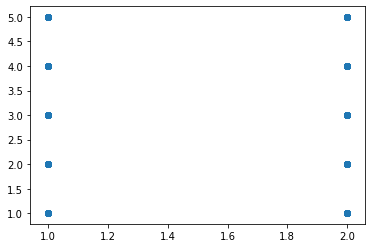

In [16]:
plt.scatter(dfq1['SeekHealthInfo'], dfq1['GeneralHealth'])

### A: basically no relation

### Q: what type of source they turned to the most recent time they looked for health information (A2); 

In [17]:
dfq1a = df[[q['A2']]].copy()
dfq1a[q['A2']].value_counts()

 7     2697
-1      951
 6      663
-5      459
 1      109
 4      103
 2      100
-2       93
-6       89
 5       47
-9       27
 9       25
 11      18
 12      16
 10      14
 3       14
 8       13
Name: WhereSeekHealthInfo, dtype: int64

In [18]:
dfq1a.head()

,WhereSeekHealthInfo
0,-1
1,7
2,7
3,6
4,7


In [19]:
dfq1a.shape

(5438, 1)

In [20]:
# remove any negatives
dfq1a = dfq1a[(dfq1a['WhereSeekHealthInfo'] > 0)]

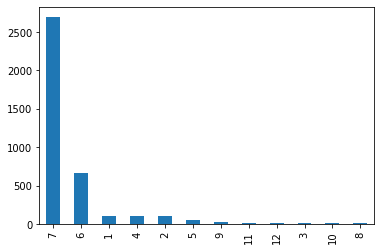

In [21]:
pd.value_counts(dfq1a['WhereSeekHealthInfo']).plot.bar()

In [22]:
dfq1a[q['A2']].value_counts()[7]/dfq1a[q['A2']].shape[0]

0.7062058130400628

### A: most common is 7, which is internet, at ~ 70% of all sources given

### Q: the barriers they faced while searching for health information (A4); 


In [23]:
q['A4']

['LotOfEffort', 'Frustrated']

In [24]:
df['LotOfEffort'].value_counts()

 3    1346
 4    1308
 2    1211
-1     934
 1     368
-2     110
-6      89
-9      70
-5       2
Name: LotOfEffort, dtype: int64

In [25]:
df['Frustrated'].value_counts()

 4    1640
 3    1108
 2     986
-1     951
 1     378
-9     192
-2      93
-6      89
-5       1
Name: Frustrated, dtype: int64

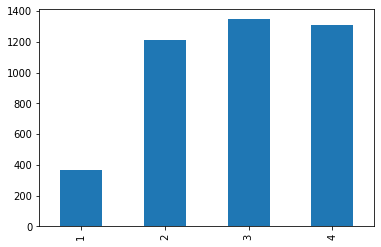

In [26]:
pd.value_counts(df[df['LotOfEffort'] > 0]['LotOfEffort']).sort_index().plot.bar()

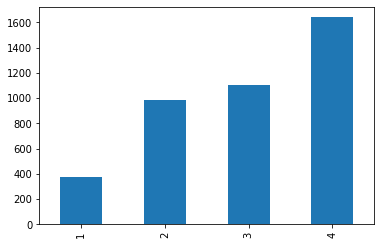

In [27]:
pd.value_counts(df[df['Frustrated'] > 0]['Frustrated']).sort_index().plot.bar()

WhereSeekHealthInfo: 7
Average LotOfEffort: 2.9076005961251865


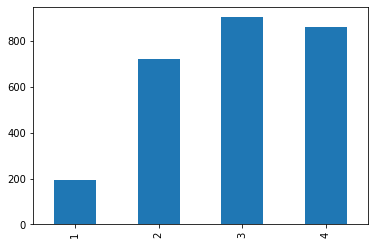

WhereSeekHealthInfo: 6
Average LotOfEffort: 2.825077399380805


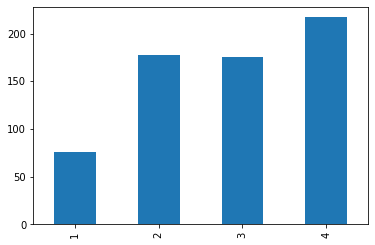

WhereSeekHealthInfo: 1
Average LotOfEffort: 2.7884615384615383


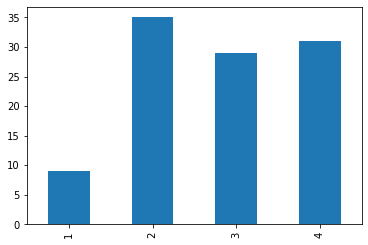

WhereSeekHealthInfo: 2
Average LotOfEffort: 2.3636363636363638


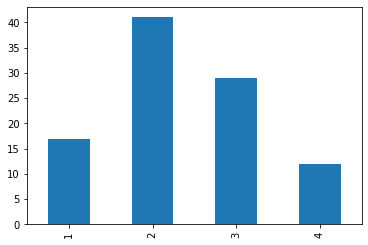

WhereSeekHealthInfo: 4
Average LotOfEffort: 2.7676767676767677


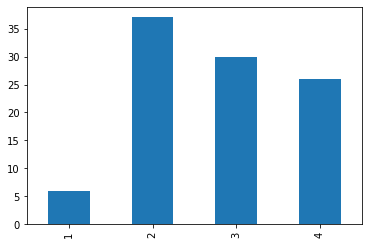

WhereSeekHealthInfo: 9
Average LotOfEffort: 2.75


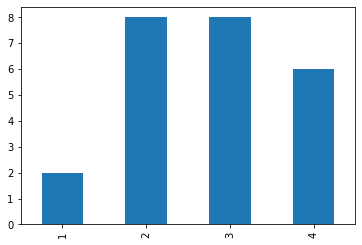

WhereSeekHealthInfo: 8
Average LotOfEffort: 2.923076923076923


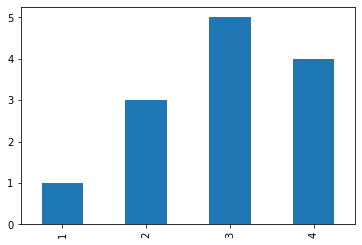

WhereSeekHealthInfo: 12
Average LotOfEffort: 2.6


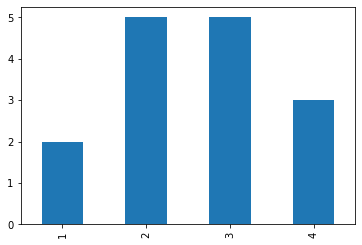

WhereSeekHealthInfo: 5
Average LotOfEffort: 2.3617021276595747


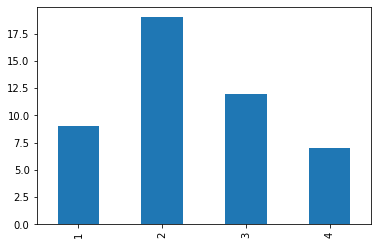

WhereSeekHealthInfo: 10
Average LotOfEffort: 2.4285714285714284


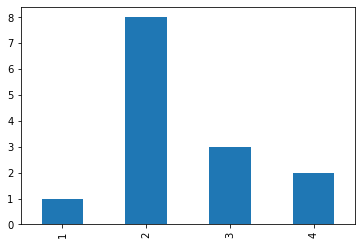

WhereSeekHealthInfo: 11
Average LotOfEffort: 2.125


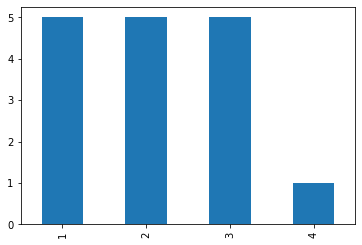

WhereSeekHealthInfo: 3
Average LotOfEffort: 2.7857142857142856


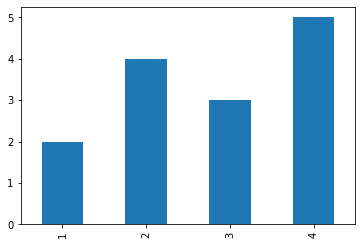

In [28]:
for place in dfq1a['WhereSeekHealthInfo'].unique():
    print("WhereSeekHealthInfo: {}".format(place))
    this_place_df = df[df['WhereSeekHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['LotOfEffort'] > 0]['LotOfEffort']).sort_index().plot.bar()
    print("Average LotOfEffort: {}".format(this_place_df[this_place_df['LotOfEffort'] > 0]['LotOfEffort'].mean()))
    plt.show()


Overall Avg Frustrated: 2.5766595794944482
WhereSeekHealthInfo: 7
Average LotOfEffort: 3.0159695817490495
Difference of avg to overall average: 0.43931000225460126


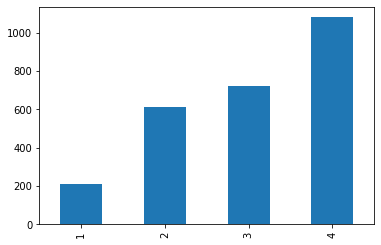

WhereSeekHealthInfo: 6
Average LotOfEffort: 2.95114006514658
Difference of avg to overall average: 0.37448048565213155


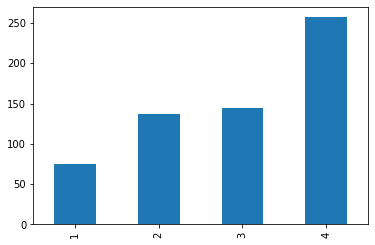

WhereSeekHealthInfo: 1
Average LotOfEffort: 3.0606060606060606
Difference of avg to overall average: 0.4839464811116123


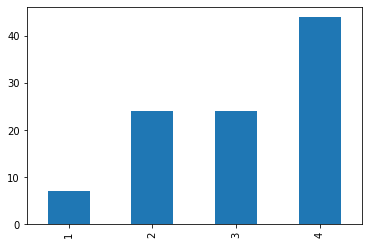

WhereSeekHealthInfo: 2
Average LotOfEffort: 2.739130434782609
Difference of avg to overall average: 0.16247085528816063


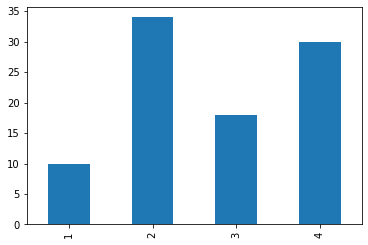

WhereSeekHealthInfo: 4
Average LotOfEffort: 2.86
Difference of avg to overall average: 0.28334042050555164


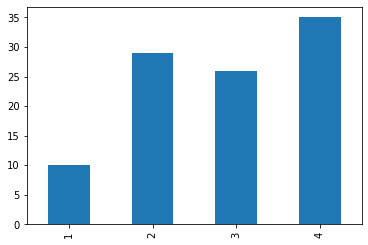

WhereSeekHealthInfo: 9
Average LotOfEffort: 3.2083333333333335
Difference of avg to overall average: 0.6316737538388852


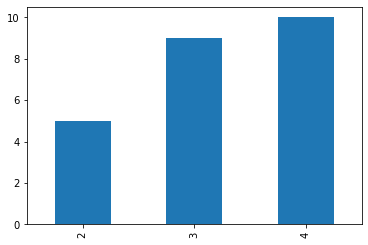

WhereSeekHealthInfo: 8
Average LotOfEffort: 3.1666666666666665
Difference of avg to overall average: 0.5900070871722183


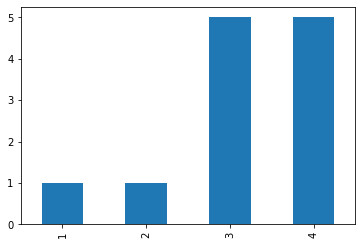

WhereSeekHealthInfo: 12
Average LotOfEffort: 3.0
Difference of avg to overall average: 0.42334042050555176


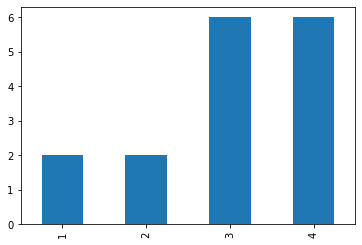

WhereSeekHealthInfo: 5
Average LotOfEffort: 2.477272727272727
Difference of avg to overall average: -0.09938685222172117


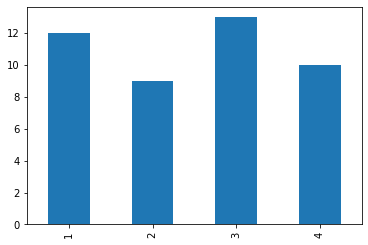

WhereSeekHealthInfo: 10
Average LotOfEffort: 2.5
Difference of avg to overall average: -0.07665957949444824


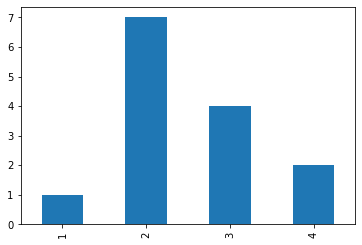

WhereSeekHealthInfo: 11
Average LotOfEffort: 2.0
Difference of avg to overall average: -0.5766595794944482


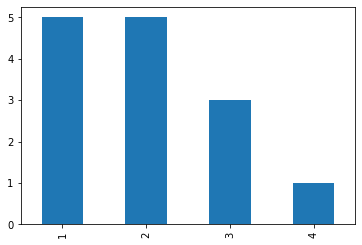

WhereSeekHealthInfo: 3
Average LotOfEffort: 2.7857142857142856
Difference of avg to overall average: 0.20905470621983735


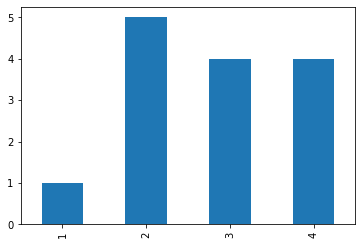

In [29]:
overall_avg_frustrated = df[df['LotOfEffort']>0]['Frustrated'].mean()
print("Overall Avg Frustrated: {}".format(overall_avg_frustrated))

for place in dfq1a['WhereSeekHealthInfo'].unique():
    print("WhereSeekHealthInfo: {}".format(place))
    this_place_df = df[df['WhereSeekHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['Frustrated'] > 0]['Frustrated']).sort_index().plot.bar()
    avg_frust = this_place_df[this_place_df['Frustrated'] > 0]['Frustrated'].mean()
    print("Average LotOfEffort: {}".format(avg_frust))
    print("Difference of avg to overall average: {}".format(avg_frust - overall_avg_frustrated))
    plt.show()



### Q: where they would turn if they had a strong need to get health information (A7)

In [30]:
dfq1c = df[[q['A7']]].copy()
dfq1c[q['A7']].value_counts()

 6     2506
 7     2217
-5      200
 4      177
-9       69
 1       63
 91      58
 5       36
 8       27
 2       26
 11      23
 12      20
 3       12
 9        3
 10       1
Name: StrongNeedHealthInfo, dtype: int64

In [31]:
dfq1c.head()

,StrongNeedHealthInfo
0,6
1,6
2,4
3,6
4,7


In [32]:
dfq1c.shape

(5438, 1)

In [33]:
#remove any negatives
dfq1c = dfq1c[(dfq1c['StrongNeedHealthInfo'] > 0)]

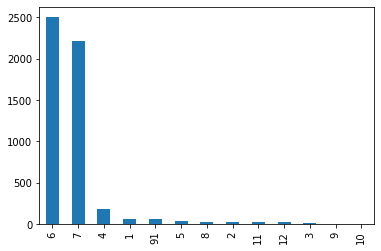

In [34]:
pd.value_counts(dfq1c['StrongNeedHealthInfo']).plot.bar()

In [35]:
dfq1c[q['A7']].value_counts()[7]/dfq1c[q['A7']].shape[0]

0.4289030760301799

### A: Individuals turn to doctors first before turning to the internet for information relating to health

In [36]:
#temp = genh_strh_df[['GeneralHealth','SeekHealthInfo','StrongNeedHealthInfo']]
#temp.groupby(['GeneralHealth''StrongNeedHealthInfo']).count().plot(kind='bar', figsize = (20,7))

### Q: whether they have used a computer, smartphone, or electronic means to look for health information (B5a)

In [37]:
#look into if people looked for health information for self
dfq1d = df[[q['B5']]].copy()
dfq1d.head()

,Electronic_SelfHealthInfo
0,2
1,2
2,1
3,1
4,1


In [38]:
dfq1d['Electronic_SelfHealthInfo'].value_counts()

 1    3792
 2    1562
-9      84
Name: Electronic_SelfHealthInfo, dtype: int64

In [39]:
# remove any negatives
dfq1d = dfq1d[(dfq1d['Electronic_SelfHealthInfo'] > 0)]

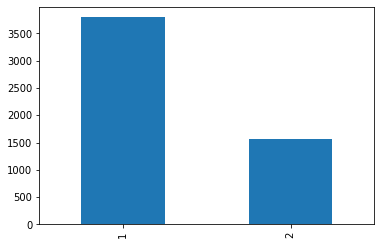

In [40]:
pd.value_counts(dfq1d['Electronic_SelfHealthInfo']).plot.bar()

In [41]:
q['B4']

['WhereUseInternet_Home',
 'WhereUseInternet_Work',
 'WhereUseInternet_PublicPlace',
 'WhereUseInternet_MobileDevice']

In [42]:
df['WhereUseInternet_Home'].value_counts()

 1    2254
 2    1418
-1     890
 4     258
 3     216
-2     184
-9     173
-6      42
-5       3
Name: WhereUseInternet_Home, dtype: int64

In [43]:
df['WhereUseInternet_Work'].value_counts()

 1    1471
 4    1396
-1     933
 2     541
 3     539
-9     370
-2     141
-6      42
-5       5
Name: WhereUseInternet_Work, dtype: int64

In [44]:
df['WhereUseInternet_PublicPlace'].value_counts()

 3    2472
-1     929
 4     710
 2     699
-9     394
-2     145
-6      42
 1      41
-5       6
Name: WhereUseInternet_PublicPlace, dtype: int64

In [45]:
df['WhereUseInternet_MobileDevice'].value_counts()

 1    2806
 2    1018
-1     893
 3     218
-2     181
 4     150
-9     127
-6      42
-5       3
Name: WhereUseInternet_MobileDevice, dtype: int64

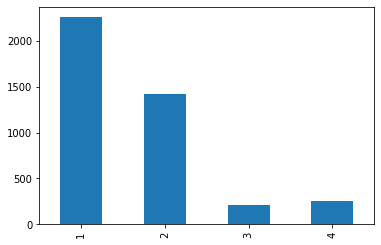

In [46]:
pd.value_counts(df[df['WhereUseInternet_Home'] > 0]['WhereUseInternet_Home']).sort_index().plot.bar()

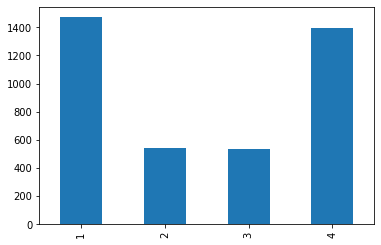

In [119]:
pd.value_counts(df[df['WhereUseInternet_Work'] > 0]['WhereUseInternet_Work']).sort_index().plot.bar()

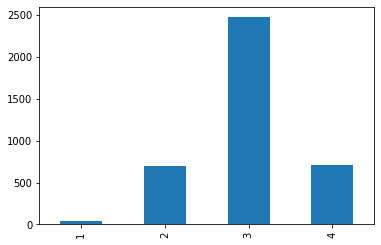

In [120]:
pd.value_counts(df[df['WhereUseInternet_PublicPlace'] > 0]['WhereUseInternet_PublicPlace']).sort_index().plot.bar()


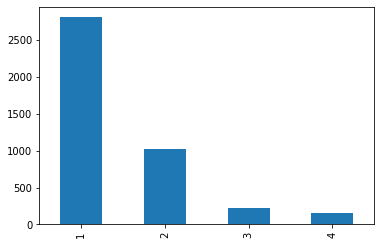

In [121]:
pd.value_counts(df[df['WhereUseInternet_MobileDevice'] > 0]['WhereUseInternet_MobileDevice']).sort_index().plot.bar()

Electronic_SelfHealthInfo: 2
Average UseInternet_Home: 1.8460471567267684


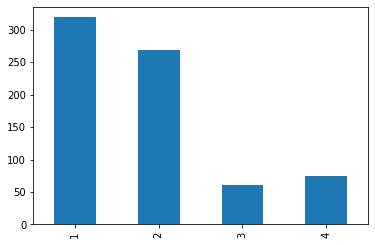

Electronic_SelfHealthInfo: 1
Average UseInternet_Home: 1.5865300146412884


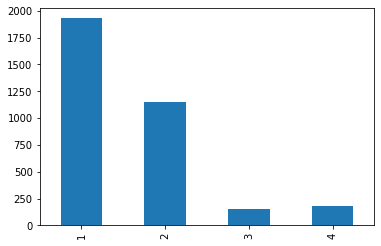

In [47]:
for place in dfq1d['Electronic_SelfHealthInfo'].unique():
    print("Electronic_SelfHealthInfo: {}".format(place))
    this_place_df = df[df['Electronic_SelfHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['WhereUseInternet_Home'] > 0]['WhereUseInternet_Home']).sort_index().plot.bar()
    print("Average UseInternet_Home: {}".format(this_place_df[this_place_df['WhereUseInternet_Home'] > 0]['WhereUseInternet_Home'].mean()))
    plt.show()

Electronic_SelfHealthInfo: 2
Average UseInternet_Work: 2.8577844311377247


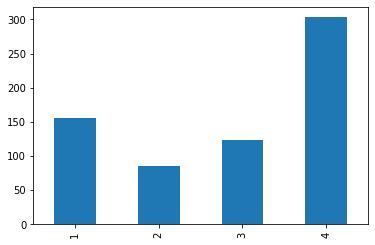

Electronic_SelfHealthInfo: 1
Average UseInternet_Work: 2.393151941302354


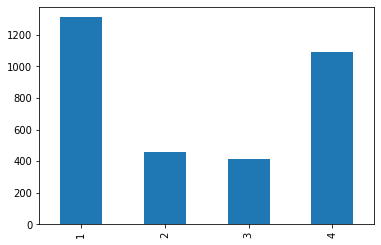

In [48]:
for place in dfq1d['Electronic_SelfHealthInfo'].unique():
    print("Electronic_SelfHealthInfo: {}".format(place))
    this_place_df = df[df['Electronic_SelfHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['WhereUseInternet_Work'] > 0]['WhereUseInternet_Work']).sort_index().plot.bar()
    print("Average UseInternet_Work: {}".format(this_place_df[this_place_df['WhereUseInternet_Work'] > 0]['WhereUseInternet_Work'].mean()))
    plt.show()

Electronic_SelfHealthInfo: 2
Average UseInternet_public: 3.125937031484258


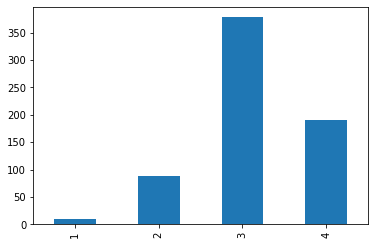

Electronic_SelfHealthInfo: 1
Average UseInternet_public: 2.952542372881356


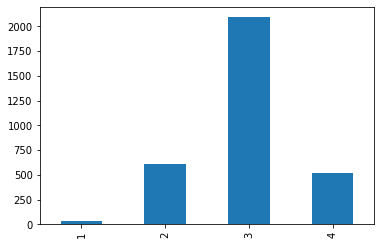

In [126]:
for place in dfq1d['Electronic_SelfHealthInfo'].unique():
    print("Electronic_SelfHealthInfo: {}".format(place))
    this_place_df = df[df['Electronic_SelfHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['WhereUseInternet_PublicPlace'] > 0]['WhereUseInternet_PublicPlace']).sort_index().plot.bar()
    print("Average UseInternet_public: {}".format(this_place_df[this_place_df['WhereUseInternet_PublicPlace'] > 0]['WhereUseInternet_PublicPlace'].mean()))
    plt.show()

People are not comfrotabl looking for health information using a public place like the library

Electronic_SelfHealthInfo: 2
Average UseInternet_MobileDevice: 1.7425474254742548


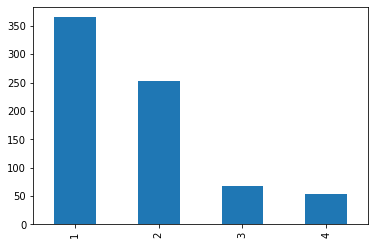

Electronic_SelfHealthInfo: 1
Average UseInternet_MobileDevice: 1.3907611853573503


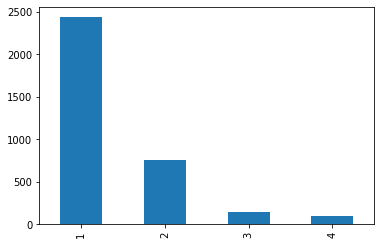

In [127]:
for place in dfq1d['Electronic_SelfHealthInfo'].unique():
    print("Electronic_SelfHealthInfo: {}".format(place))
    this_place_df = df[df['Electronic_SelfHealthInfo'] == place]
    pd.value_counts(this_place_df[this_place_df['WhereUseInternet_MobileDevice'] > 0]['WhereUseInternet_MobileDevice']).sort_index().plot.bar()
    print("Average UseInternet_MobileDevice: {}".format(this_place_df[this_place_df['WhereUseInternet_MobileDevice'] > 0]['WhereUseInternet_MobileDevice'].mean()))
    plt.show()

#### A: People use mobile phones followed by Home computer and then work. If indiduvals were looking for information for themselfs looking up information at work daily is a common thing. However indidivudals do no use publice places to look up medical information. I wonder why they few work to be non public?

### Q: They have shared health information on social networking sites, such as Facebook or Twitter (B14b)]?

In [168]:
q['B14']

'IntRsn_SharedSocNet'

In [180]:
#look into if people looked for health information for self
dfq1e = df[[q['B14']]].copy()
dfq1e.head()

,IntRsn_SharedSocNet
0,2
1,2
2,2
3,2
4,2


In [181]:
df['IntRsn_SharedSocNet'].value_counts()

 2    4707
 1     636
-9      93
-7       2
Name: IntRsn_SharedSocNet, dtype: int64

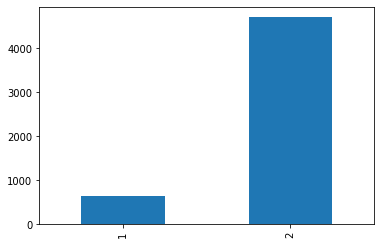

In [182]:
pd.value_counts(df[df['IntRsn_SharedSocNet'] > 0]['IntRsn_SharedSocNet']).sort_index().plot.bar()


In [184]:
dfq2 = df[[q['A1'],q['F1'],q['B14']]].copy()
dfq2.head()

,SeekHealthInfo,GeneralHealth,IntRsn_SharedSocNet
0,2,4,2
1,1,3,2
2,1,4,2
3,1,2,2
4,1,2,2


In [185]:
# remove any negatives
dfq2 = dfq2[(dfq2['SeekHealthInfo'] > 0) & (dfq2['GeneralHealth'] > 0) & (dfq2['IntRsn_SharedSocNet'] > 0)]

In [186]:
# get pearson's correlation between F1 and B14
dfq2.corr()['SeekHealthInfo']['IntRsn_SharedSocNet']

0.07890782591522542

In [187]:
# get pearson's correlation between A1 and B14
dfq2.corr()['GeneralHealth']['IntRsn_SharedSocNet']


0.03317300858640735

### A: No Corrlection between peoples desires to share their information publicly linked to their general health or health seeking information desire